In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [3]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'NAFTRACISHRS.MX'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [4]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,43.299999,42.349998,42.450001,43.169998,34389155.0,42.003643
2019-03-21,43.430000,42.970001,43.150002,43.320000,18415417.0,42.149590
2019-03-22,43.150002,42.250000,43.049999,42.340000,37550044.0,41.196068
2019-03-25,42.840000,42.439999,42.549999,42.790001,22193273.0,41.633911
2019-03-26,43.070000,42.779999,42.820000,42.910000,15219116.0,41.750668


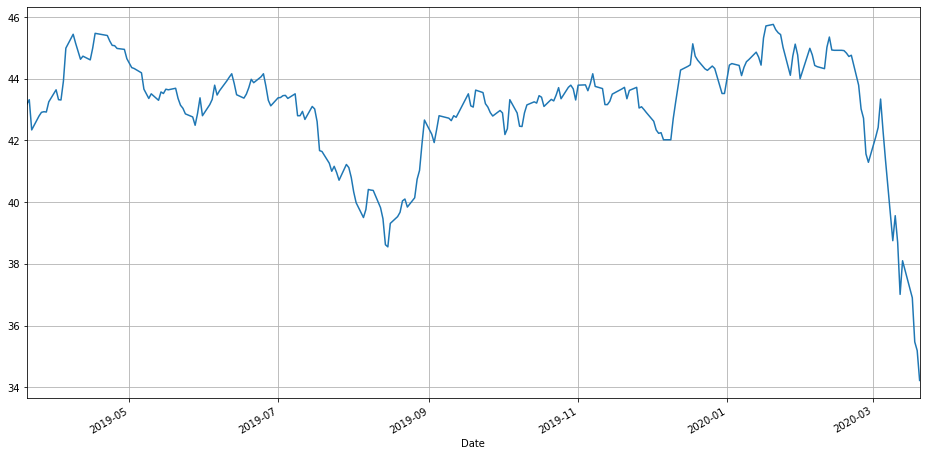

In [5]:
%matplotlib inline 
fig = plt.figure(figsize = (16,8))
data.Close.plot()
plt.grid()

In [6]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    Cr = pd.Series(df['Close'].shift(1), name = 'Cr')
    df = df.join(Cr)
    ROCr = pd.Series(ROC.shift(1), name = 'ROC_' + str(n) + '_r')
    df = df.join(ROCr)
    df['Recomendación'] = '-'
    
    df.loc[((ROC > 0) & (ROCr < 0)), 'Recomendación'] = 'Se recomienda COMPRAR la acción.'
    df.loc[((ROC < 0) & (ROCr > 0)), 'Recomendación'] = 'Se recomienda VENDER la acción.'
    df.loc[((df['Close'] < Cr) & ((ROC > 0) & (ROCr < 0) & (ROC > ROCr))), 'Recomendación'] = 'Se recomienda COMPRAR la acción. (DIV)'
    df.loc[((df['Close'] > Cr) & ((ROC < 0) & (ROCr > 0) & (ROC < ROCr))), 'Recomendación'] = 'Se recomienda VENDER la acción. (DIV)'    
    
    return df

In [7]:
df2 = ROC(data, 10)

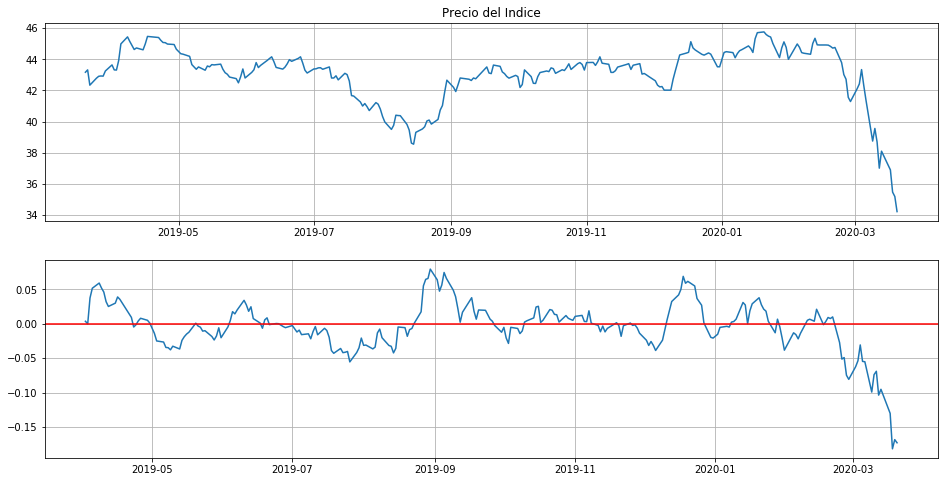

,Close,ROC_10,Recomendación
Date,,,
2019-04-03,43.310001,-0.000231,Se recomienda VENDER la acción.
2019-04-04,43.919998,0.037317,Se recomienda COMPRAR la acción.
2019-04-23,45.220001,-0.004841,Se recomienda VENDER la acción.
2019-04-25,45.070000,0.004010,Se recomienda COMPRAR la acción. (DIV)
2019-05-02,44.360001,-0.014003,Se recomienda VENDER la acción.
2019-05-20,43.689999,0.000687,Se recomienda COMPRAR la acción.
2019-05-21,43.360001,-0.003447,Se recomienda VENDER la acción.
2019-06-04,43.330002,0.004404,Se recomienda COMPRAR la acción.
2019-06-18,43.500000,-0.006623,Se recomienda VENDER la acción. (DIV)


In [8]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_10)
plt.axhline(y=0, color= 'r')
plt.grid()
plt.show()
df2.loc[df2['Recomendación'] != '-',['Close', 'ROC_10', 'Recomendación']]
#df2[['Close', 'ROC_10', 'Recomendación']]